# HW 1
20214591 정윤진

In [308]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

In [315]:
def plot_amp(x, fs, title):  
    plt.figure(figsize=(10, 5))
    n = np.arange(x.shape[0])
    plt.plot(n/fs, x)
    plt.grid(True)
    plt.title(title)
    plt.xlabel('Second')
    plt.ylabel('Amplitude')
    
def show_db_and_phase(x_fft, freq_range):
    plt.figure(figsize=(10,10))
    
    plt.subplot(2, 1, 1)
    x_mag = np.abs(x_fft)
    x_db = 20 * np.log10(x_mag/max(x_mag))
    plt.plot(freq_range, x_db)
    plt.grid(True)
    plt.title('dB Scale')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Decibel(dB)')
    
    plt.subplot(2, 1, 2)
    x_phs = np.angle(x_fft)
    plt.stem(freq_range, x_phs)
    plt.title('Phase')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('???')

**Problem #2: Discrete Fourier Transform (20 pts.)**

First, generate a sinusoidal waveform with 440Hz frequency and 8kHz sampling rate (1 second long). Verify the result by plotting the waveform and playing it back.

In [319]:
fs = 8000       # sampling rate
dur = 1         # duration, 1 second
f0 = 440        # frequency
ph = np.pi/6    # Initial Phase

window_size = 160
fft_size = 256

x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs - ph)
ipd.Audio(x, rate=fs)

1. Segment the sinusoid with a 20ms-long rectangular window (size 160 samples) and perform DFT (size 256 samples) on the segment with zero-padding. Plot the magnitude response in dB and phase response (5pts.)

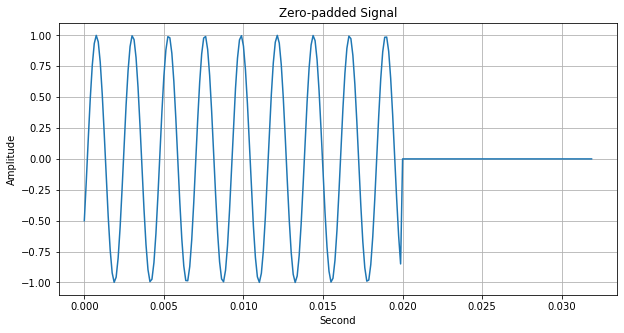

In [318]:
x_seg = x[:window_size]
x_seg = np.append(x_seg, np.zeros(fft_size-window_size))
plot_amp(x_seg, fs, 'Zero-padded Signal')

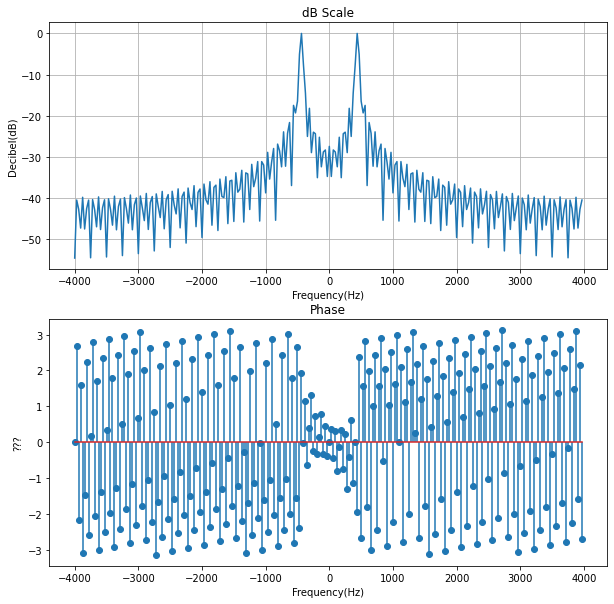

In [312]:
freq_range = np.arange(-(fft_size/2), (fft_size/2))*fs/fft_size
x_fft = np.fft.fft(x_seg)
x_fft = np.fft.fftshift(x_fft, axes=0)
show_dbfs_and_phase(x_fft, freq_range)

2. Repeat 1 with Hann window. Discuss the difference in the magnitude response. (5 pts.)

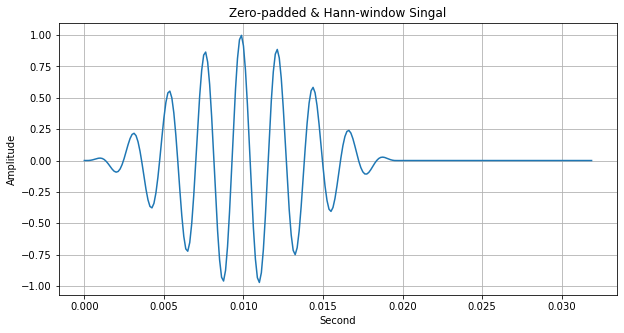

In [320]:
x_seg = x[:window_size]
x_seg = x_seg * np.hanning(window_size)
x_seg = np.append(x_seg, np.zeros(fft_size-window_size))
plot_amp(x_seg, fs, 'Zero-padded & Hann-window Singal')

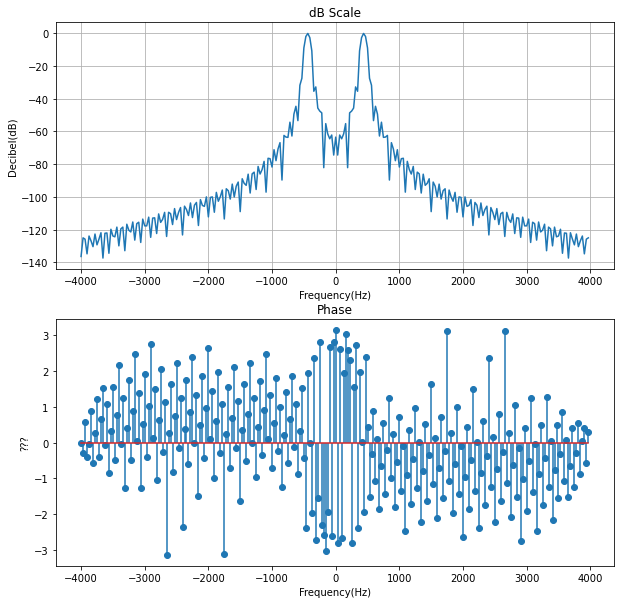

In [314]:
# 여기 참 중복이당
freq_range = np.arange(-(fft_size/2), (fft_size/2))*fs/fft_size
x_fft = np.fft.fft(x_seg)
x_fft = np.fft.fftshift(x_fft, axes=0)
show_dbfs_and_phase(x_fft, freq_range)

3. Repeat 2 with zero-padding such that FFT size becomes 1024. Discuss the difference in the magnitude response. (10 pts.

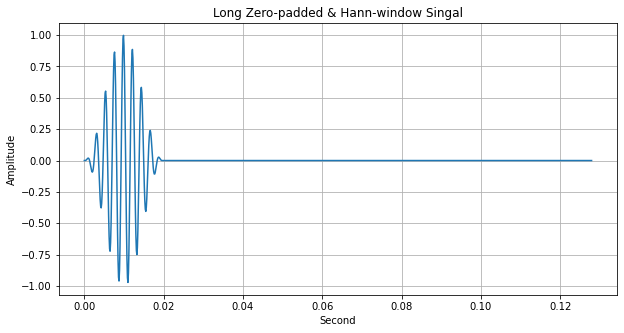

In [321]:
fft_size = 1024
x_seg = x[:window_size]
x_seg = x_seg * np.hanning(window_size)
# zero-padding
x_seg = np.append(x_seg, np.zeros(fft_size-window_size))
plot_amp(x_seg, fs, 'Long Zero-padded & Hann-window Singal')

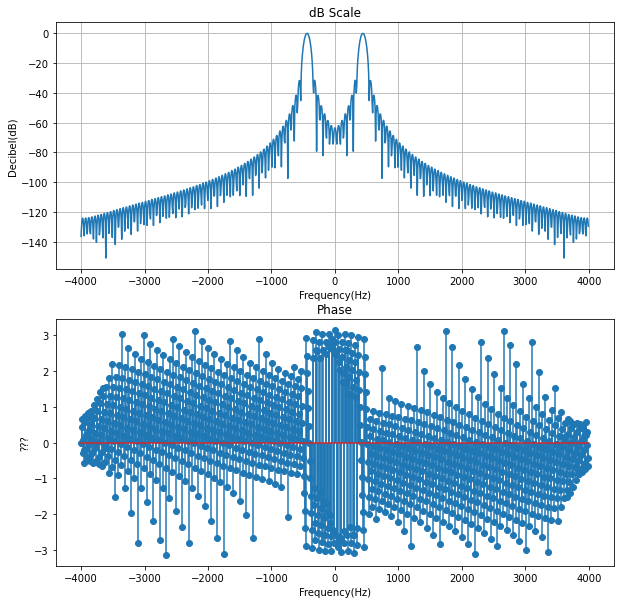

In [206]:
freq_range = np.arange(-(fft_size/2), (fft_size/2))*fs/fft_size
x_fft = np.fft.fft(x_seg)
x_fft = np.fft.fftshift(x_fft, axes=0)
show_dbfs_and_phase(x_fft, freq_range)

***
**Problem #3: Short-time Fourier Transform (50 pts.)**
1. Implement a short-time Fourier transform function as follows (20pts.):

In [298]:
import torch

def stft(x, window, hop_size, fft_size):
    # x: input samples (1-D vector)
    # window: a window vector (e.g. window = hann(1024) where 1024 is the window size )
    # hop_size: must be less than window size
    # y: 2-D STFT matrix (complex numbers)

    ### Your Implementation of STFT ###
    # 일단 무지성 밑그림
    sample_size = x.shape[0]
    window_size = window.shape[0]
    frame_size = int((sample_size-window_size)/hop_size)+1
    
    y = []
    for i in range(frame_size):
        frame = x[i*hop_size:i*hop_size+window_size]
        frame = frame*window
        y.append(np.fft.rfft(frame))

    return np.array(y).T

2. Load the provided glockenspiel WAV file and plot the spectrogram using your STFT function. Plot the spectrogram with two different window sizes such that one has high-time resolution and the other high frequency resolution. Describe what you observe (10 pts.)

In [266]:
sr = 16000
x = librosa.load('./glockenspiel_short.wav', sr)[0]
ipd.Audio(x, rate=sr)

Text(0.5, 1.0, 'Spectrogram (dB)')

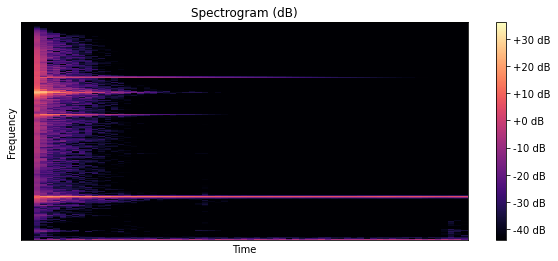

In [299]:
window_size = 1024
window = np.hanning(window_size)
y = stft(x, window, hop_size=512, fft_size=1024)

magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=512)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

(513, 69)


Text(0.5, 1.0, 'Spectrogram (dB)')

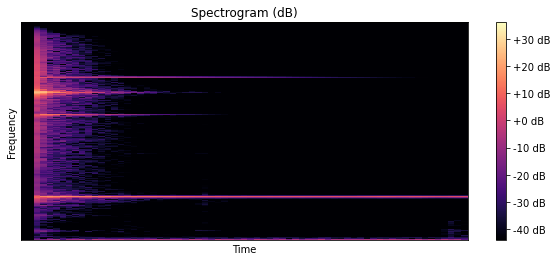

In [302]:
# 일단 정답 보기
x = librosa.load('./glockenspiel_short.wav', 16000)[0]
y = librosa.stft(x, n_fft=1024, hop_length=512, win_length=1024, center=False)
print(y.shape)

magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=512)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

3. Record your voice using Audacity (about 2-3 sec) and store it as a .wav file. Repeat b), particularly paying attention to vowel sounds. (10 pts.)

4. Choose a music audio file (less than 10 seconds) and plot the spectrogram. Again, adjust the STFT parameters and see how they change the spectrogram. Compare your visual observation to what you hear in terms of musical element such as melodic or rhythm patterns. (10 pts.)

In [304]:
# 4번 음악 샘플
sr = 16000
x = librosa.load('./wtf.wav', sr=sr, offset= 1, duration=5)[0]
ipd.Audio(x, rate=sr)

Text(0.5, 1.0, 'Spectrogram (dB)')

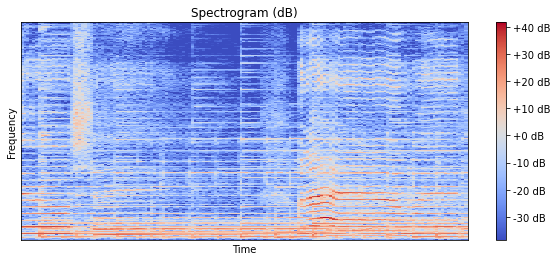

In [305]:
window_size = 1024
window = np.hanning(window_size)
y = stft(x, window, hop_size=512, fft_size=1024)

magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=512)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'Spectrogram (dB)')

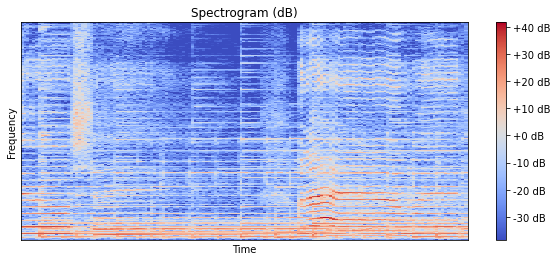

In [306]:
# 정답
y = librosa.stft(x, n_fft=1024, hop_length=512, win_length=1024, center=False)

magnitude = np.abs(y)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=512)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")